In [4]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly_express as px

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyaruhernandez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jyaruhernandez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jyaruhernandez/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyaruhernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df['target'] = df['target'].map({1: 'real disaster', 0: 'not-real disaster'})

In [7]:
def funcion_preprocesamiento(texto):
    texto = re.sub(r'(#\w+)','',texto)

    texto = re.sub(r"(\w+:\/\/\S+)",'',texto)

    texto = re.sub(r'(@[A-Za-z0-9]+)','',texto)

    texto = re.sub(r'\\[A-Za-z0-9]{3}','',texto)
    texto = re.sub(r'\\n','',texto)
    texto = re.sub(r'\\','',texto)
    texto = re.sub(r'"','',texto)
    texto = re.sub(r"'",'',texto)
    texto = re.sub(r'[^\w\s]','',texto)
    texto= re.sub(r'amp','',texto)
    texto = texto.lower()
    texto = re.sub(r'([^A-Za-z \t])|(\d)','',texto)
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra) for palabra in texto]
    texto = ' '.join(texto)
    return texto

In [8]:
df['clean_text'] = df['text'].apply(funcion_preprocesamiento)
final_reales = df[df['target'] == "real disaster"]['clean_text'].str.cat(sep=' ')
final_no_reales = df[df['target'] == "not-real disaster"]['clean_text'].str.cat(sep=' ')

<Axes: >

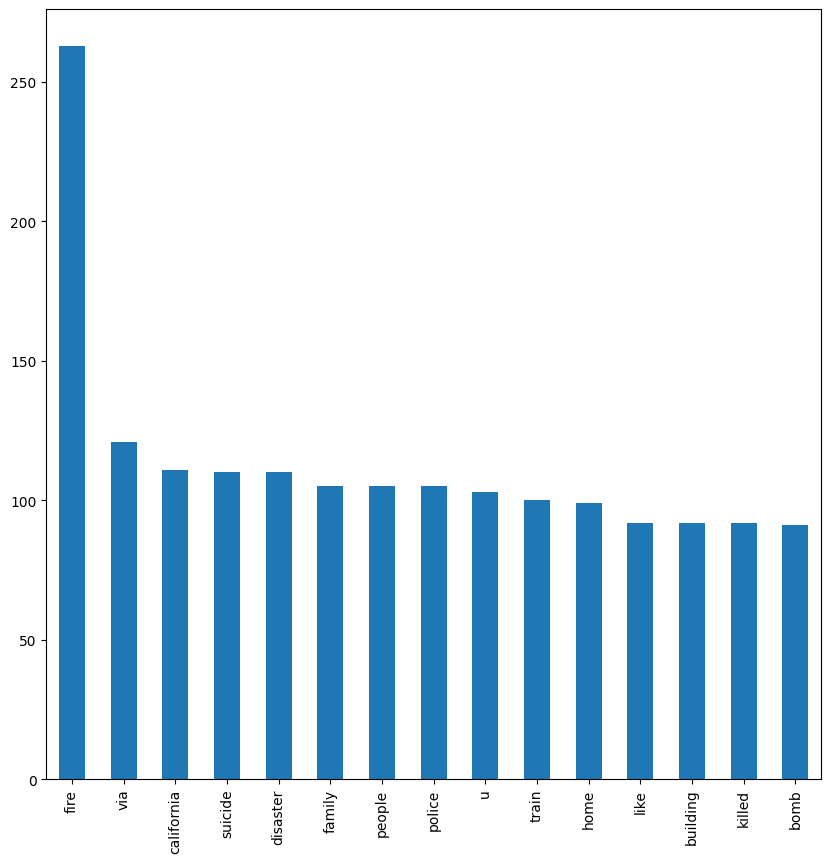

In [9]:
df[df['target'] == 'real disaster']['clean_text'].str.split(expand=True).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))

<Axes: >

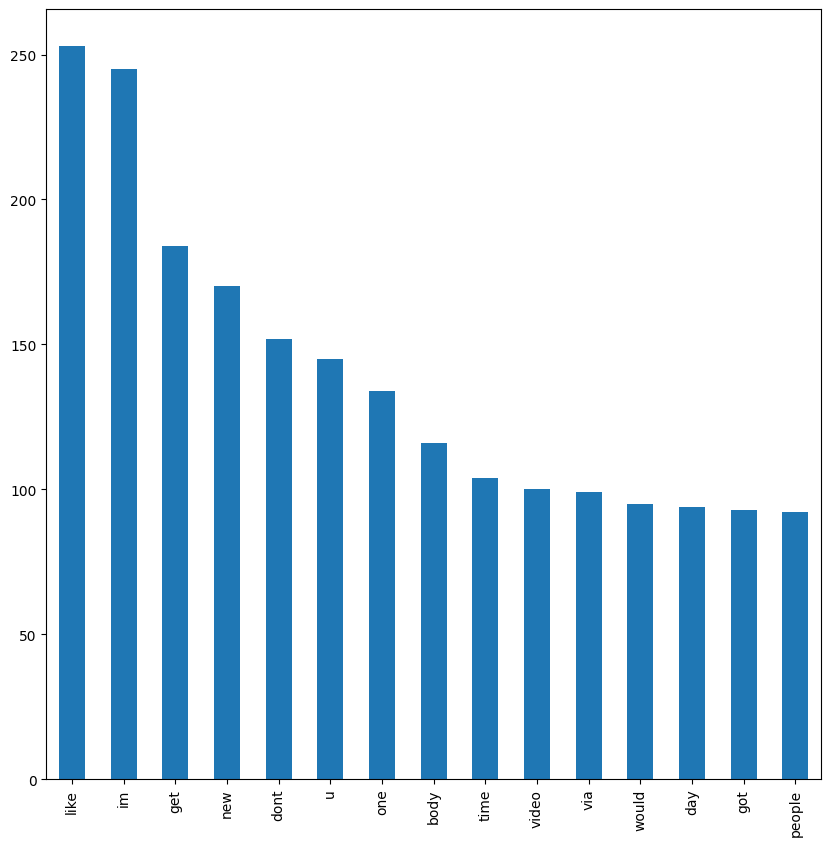

In [10]:
df[df['target'] == 'not-real disaster']['clean_text'].str.split(expand=True).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))

/var/folders/nv/ksk0d6s97wn1w79g49h1gwp00000gn/T/ipykernel_26340/3570597508.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[df['target'] == 'real disaster']['clean_text'].str.split().apply(nltk.bigrams).apply(pd.Series).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))


<Axes: >

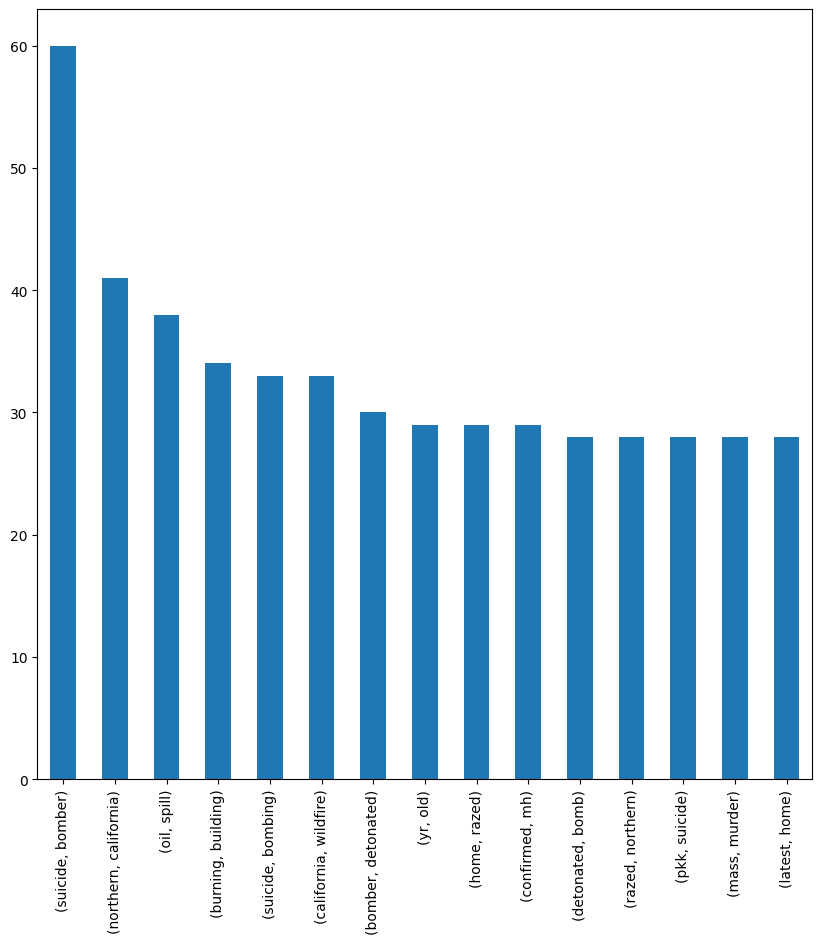

In [11]:
df[df['target'] == 'real disaster']['clean_text'].str.split().apply(nltk.bigrams).apply(pd.Series).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))

/var/folders/nv/ksk0d6s97wn1w79g49h1gwp00000gn/T/ipykernel_26340/4016443059.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[df['target'] == 'not-real disaster']['clean_text'].str.split().apply(nltk.bigrams).apply(pd.Series).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))


<Axes: >

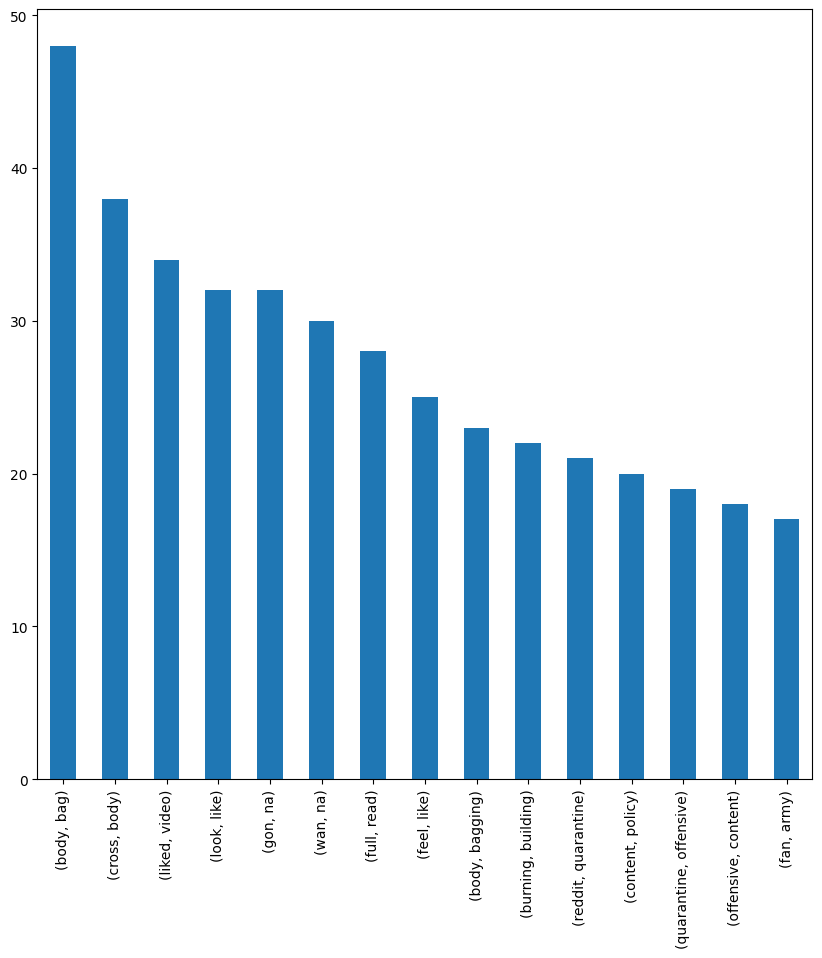

In [12]:
df[df['target'] == 'not-real disaster']['clean_text'].str.split().apply(nltk.bigrams).apply(pd.Series).stack().value_counts().head(15).plot(kind='bar', figsize=(10,10))